In [70]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [71]:
pca1 = PCA(0.95)

In [72]:
cluster_features = pd.read_csv("./datasets/cluster_features.csv")

In [73]:
cluster_features_api = pd.read_csv('./datasets/cluster_features_api.csv')

In [74]:
cluster_columns = cluster_features.columns[1:]

In [75]:
cluster_features_normalized = cluster_features.copy(deep=True)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scalar = StandardScaler()

In [78]:
scalar.fit(cluster_features.drop(columns=['cluster_id']))

StandardScaler()

In [79]:
normalized_features = scalar.transform(cluster_features.drop(columns=['cluster_id']))

In [80]:
normalized_features

array([[ 0.22210176,  0.39950777,  0.30323765, ...,  0.26799726,
         0.00344001,  0.11348102],
       [ 0.20917887,  0.02928045, -0.05491267, ...,  0.02040521,
         0.11421919,  0.24366549],
       [ 0.0665845 , -0.34349072, -0.09714958, ..., -0.39698309,
        -0.05946138,  0.04480356],
       ...,
       [-0.24841497, -0.29865421, -0.28072567, ..., -0.31354662,
        -0.09517073, -0.10417203],
       [-0.21078731, -0.15583203, -0.15203936, ..., -0.12519723,
        -0.25514859, -0.22498241],
       [-0.44881417, -0.43642932, -0.47212611, ..., -0.46758273,
        -0.29056609, -0.27407037]])

In [81]:
columns =list(scalar.get_feature_names_out())

In [82]:
cluster_features_normalized = pd.DataFrame(normalized_features,columns=columns)

In [83]:
cluster_features_normalized.describe()

,daily_cpu_max,daily_cpu_min,daily_cpu_avg,daily_cpu_top_5_max_avg,daily_cpu_top_5_min_avg,daily_cpu_min_max_diff,daily_min_max_5_diff,weekly_cpu_max,weekly_cpu_min,weekly_cpu_avg,...,weekly_cpu_top_5_min_avg,weekly_cpu_min_max_diff,weekly_min_max_5_diff,all_metric_max,all_metric_min,all_metric_avg,all_top_5_max_avg,all_top_5_min_avg,all_min_max_diff,all_min_max_5_diff
count,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,...,6.693000e+03,6.693000e+03,6693.0,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03,6.693000e+03
mean,3.184862e-18,-2.494809e-17,1.061621e-17,5.308104e-17,3.901456e-17,1.910917e-17,6.369724e-18,-7.484426e-17,-5.520428e-17,1.220864e-17,...,1.220864e-17,4.989617e-17,0.0,-4.193402e-17,-1.486269e-17,2.017079e-17,-2.123241e-18,-7.006697e-17,3.927997e-17,-5.838914e-18
std,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,0.0,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-4.640183e-01,-4.557181e-01,-4.886487e-01,-4.720632e-01,-4.628048e-01,-3.626066e-01,-3.456099e-01,-5.072188e-01,-4.542943e-01,-4.886487e-01,...,-4.886487e-01,-4.308648e-01,0.0,-3.520132e-01,-2.222588e+01,-4.886487e-01,-3.471153e-01,-4.668369e+00,-2.944507e-01,-2.793191e-01
25%,-2.793489e-01,-2.377950e-01,-2.756958e-01,-2.834284e-01,-2.463884e-01,-3.054708e-01,-2.967105e-01,-3.003187e-01,-2.476849e-01,-2.756958e-01,...,-2.756958e-01,-3.741840e-01,0.0,-2.491560e-01,-2.320390e-01,-2.756958e-01,-2.312993e-01,-2.396108e-01,-2.434207e-01,-2.286815e-01
50%,-1.822859e-01,-1.684028e-01,-1.847693e-01,-1.833575e-01,-1.747621e-01,-2.004462e-01,-1.994918e-01,-1.926371e-01,-1.756912e-01,-1.847693e-01,...,-1.847693e-01,-2.572166e-01,0.0,-1.659133e-01,-1.621885e-01,-1.847693e-01,-1.586022e-01,-1.678147e-01,-1.663900e-01,-1.579671e-01
75%,1.498333e-02,-2.411534e-03,2.756551e-02,1.348300e-02,8.968161e-04,-2.240390e-02,-1.770566e-02,2.318813e-02,-5.004666e-03,2.756551e-02,...,2.756551e-02,-5.319244e-03,0.0,-7.989279e-03,2.964875e-03,2.756551e-02,-7.186322e-03,1.111714e-03,-1.396777e-02,-1.611884e-02
max,4.618745e+01,5.330171e+01,4.940573e+01,4.681843e+01,5.151739e+01,4.494980e+01,5.012108e+01,4.805773e+01,4.961131e+01,4.940573e+01,...,4.940573e+01,2.976455e+01,0.0,4.635524e+01,5.233297e+01,4.940573e+01,5.465919e+01,5.378394e+01,4.084659e+01,5.096883e+01


In [84]:
scalar.mean_

array([ 9.86676469,  5.7431849 ,  7.62124249,  9.39940856,  6.02842981,
        4.12357978,  3.37097875,  9.06355227,  6.26037489,  7.62124249,
        7.62124249,  7.62124249,  2.80317738,  0.        , 17.3699127 ,
        4.89539399,  7.62124249, 13.70013331,  5.14091772, 12.47451871,
        8.55921559])

In [85]:
cluster_features.describe()

,daily_cpu_max,daily_cpu_min,daily_cpu_avg,daily_cpu_top_5_max_avg,daily_cpu_top_5_min_avg,daily_cpu_min_max_diff,daily_min_max_5_diff,weekly_cpu_max,weekly_cpu_min,weekly_cpu_avg,...,weekly_cpu_top_5_min_avg,weekly_cpu_min_max_diff,weekly_min_max_5_diff,all_metric_max,all_metric_min,all_metric_avg,all_top_5_max_avg,all_top_5_min_avg,all_min_max_diff,all_min_max_5_diff
count,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,...,6693.000000,6693.000000,6693.0,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000,6693.000000
mean,9.866765,5.743185,7.621242,9.399409,6.028430,4.123580,3.370979,9.063552,6.260375,7.621242,...,7.621242,2.803177,0.0,17.369913,4.895394,7.621242,13.700133,5.140918,12.474519,8.559216
std,20.290543,11.668160,14.703303,18.954649,12.105877,11.372899,9.754439,16.978688,12.843260,14.703303,...,14.703303,6.506418,0.0,48.009387,9.456277,14.703303,38.133225,9.712363,42.368561,30.645432
min,0.452286,0.426190,0.437030,0.452286,0.426190,0.000000,0.000000,0.452286,0.426190,0.437030,...,0.437030,0.000000,0.0,0.471238,-205.262952,0.437030,0.464495,-40.196590,0.000000,0.000000
25%,4.199048,2.968762,3.567907,4.027524,3.045905,0.649751,0.476950,3.964916,3.079531,3.567907,...,3.567907,0.368762,0.0,5.408981,2.701333,3.567907,4.880606,2.813905,2.161905,1.551695
50%,6.168361,3.778381,4.904726,5.924190,3.912939,1.844095,1.425194,5.793071,4.004095,4.904726,...,4.904726,1.129744,0.0,9.405114,3.361810,4.904726,7.652571,3.511162,5.425340,3.718608
75%,10.170762,5.715049,8.026516,9.654955,6.039286,3.868802,3.198283,9.457227,6.196103,8.026516,...,8.026516,2.768571,0.0,16.986381,4.923429,8.026516,13.426116,5.151714,11.882768,8.065284
max,946.965129,627.629632,733.994382,896.760090,629.644978,515.294869,492.237430,824.959858,643.383800,733.994382,...,733.994382,196.449313,0.0,2242.690051,499.733492,733.994382,2097.875547,527.471065,1742.956559,1570.404482


In [86]:
pca1.fit(cluster_features_normalized)

PCA(n_components=0.95)

In [87]:
train = pca1.transform(cluster_features_normalized)

In [88]:
pca2 = PCA(n_components='mle')

In [89]:
pca2.fit(cluster_features_normalized)
train2 = pca2.transform(cluster_features_normalized)

In [90]:
train.shape, train2.shape

((6693, 3), (6693, 11))

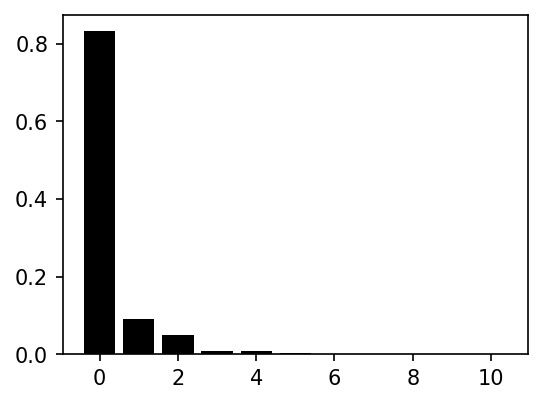

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=150)
features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_,color='black')
plt.show()

In [92]:
pca1.explained_variance_ratio_,pca2.explained_variance_ratio_

(array([0.83339201, 0.0906799 , 0.0502793 ]),
 array([8.33392005e-01, 9.06799042e-02, 5.02793001e-02, 1.00408285e-02,
        8.51970883e-03, 3.90187174e-03, 1.54353085e-03, 1.02311295e-03,
        4.09976758e-04, 1.79495067e-04, 3.02655146e-05]))

In [93]:
pca_df = pd.DataFrame(train2[:,:2])

In [94]:
pca_df[0].shape

(6693,)

Top two PCA Features of CPU

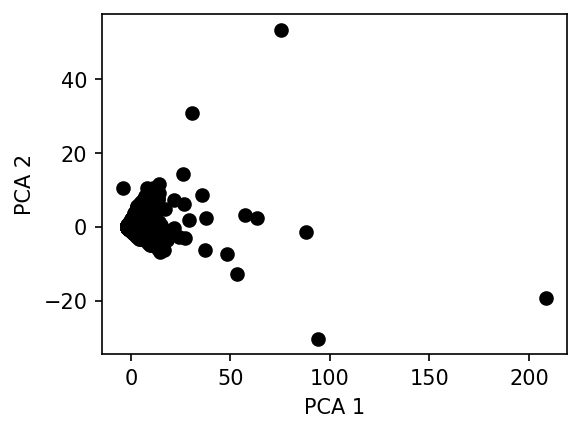

In [96]:
plt.figure(figsize=(4, 3), dpi=150)
features = range(pca2.n_components_)
plt.scatter(pca_df[0], pca_df[1],color='black')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [29]:
train.shape

(6693, 3)

In [30]:
pca_df[0].describe()

count    6.693000e+03
mean     6.369724e-18
std      4.082932e+00
min     -3.946126e+00
25%     -1.113179e+00
50%     -7.412043e-01
75%      7.126075e-02
max      2.084208e+02
Name: 0, dtype: float64

In [31]:
train2

array([[ 1.01918770e+00, -4.43576784e-01, -1.91429916e-01, ...,
         9.14719937e-02, -4.79104014e-02, -6.73525677e-04],
       [ 1.52697185e-01,  1.09523159e-01,  2.93188046e-01, ...,
        -8.49873085e-02, -4.48776208e-02, -1.45172171e-03],
       [-1.32440942e-01,  1.26880278e+00, -4.34442157e-01, ...,
         6.36126811e-02,  2.38044788e-02, -9.96908985e-03],
       ...,
       [-1.02025539e+00,  2.77131975e-01,  1.23992501e-01, ...,
         1.21300425e-02, -3.15771060e-03,  1.66679649e-03],
       [-8.06321847e-01, -2.19580396e-01, -8.74646225e-02, ...,
        -2.00178800e-02,  8.45701912e-03,  1.12272619e-02],
       [-1.87482582e+00,  5.29579787e-02,  1.83015041e-01, ...,
         1.45917213e-02, -1.09624616e-02,  6.88286226e-04]])

In [32]:
from sklearn.manifold import TSNE

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)

In [35]:
pca_df.shape

(6693, 2)

In [36]:
y_values = []
for i in range(0,130,5):
    y_values.append(i)

In [37]:
distances[:,1]

array([0.04416586, 0.0412216 , 0.03111099, ..., 0.01814268, 0.01958176,
       0.00287534])

In [38]:
distances[distances > 1]

array([  1.52327996,   4.23678235,   2.36108777,   1.42934439,
         6.41538646,  49.84240759,   7.33342482,   6.41445985,
         4.91709852,  17.35152511,   1.05057933,   1.07134813,
       115.1527323 ,   3.04896479,   3.04896479,   1.25861111,
         1.67983289,   1.11660105,   1.2201461 ,   1.18266974,
         1.52904334,   4.91709852,   1.08147942,   1.71854875,
         1.08147942,   8.9359224 ,   1.74331499,   1.72439392,
         2.20620181,   8.21390416,   1.09626865,   1.42934439,
         2.08517107,   1.47913173,   5.13787722,   1.74257011,
         6.41538646,   8.44211193,  25.0597475 ,  29.37164441,
         1.09626865,   6.41445985,   7.33342482,   1.67983289])

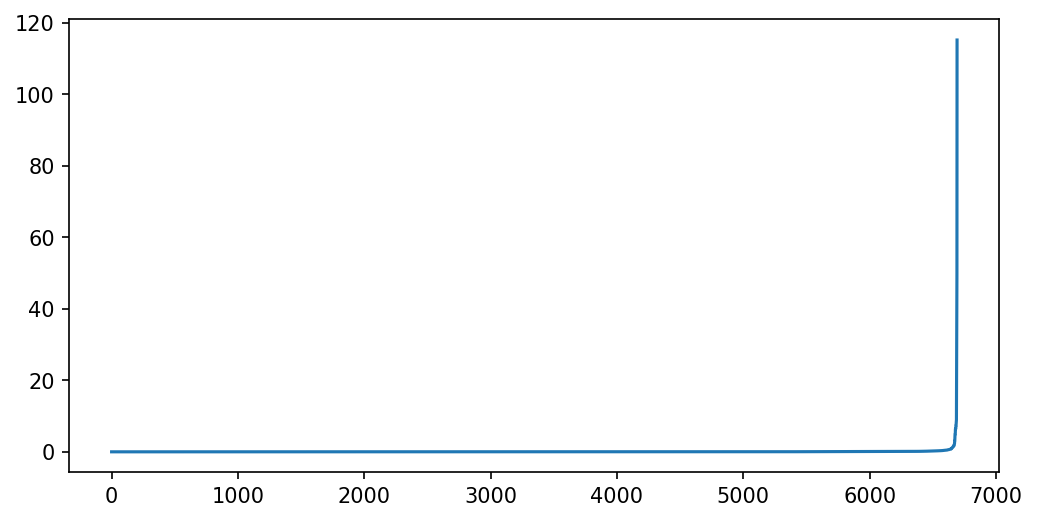

In [39]:
plt.figure(figsize=(8, 4), dpi=150)
distances = np.sort(distances[:,1])
#plt.yticks(range(1, 50,1))
plt.plot(distances)
#distances[distances > 1]

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
from collections import Counter

Model with the eps value as the starting point(3.5)

In [43]:
db = DBSCAN(eps=3.5,min_samples=5).fit(pca_df)

In [44]:
db2 = DBSCAN(eps=5.2,min_samples=2).fit(pca_df)

In [45]:
labels = Counter(db.labels_)

In [46]:
labels

Counter({0: 6669, -1: 24})

In [50]:
outliers

(array([ 562,  784, 1024, 1039, 1233, 1293, 1378, 1466, 2050, 2136, 2177,
        3260, 3665, 3965, 4224, 4721, 5318, 5673, 6009, 6237, 6303, 6396,
        6619, 6641]),)

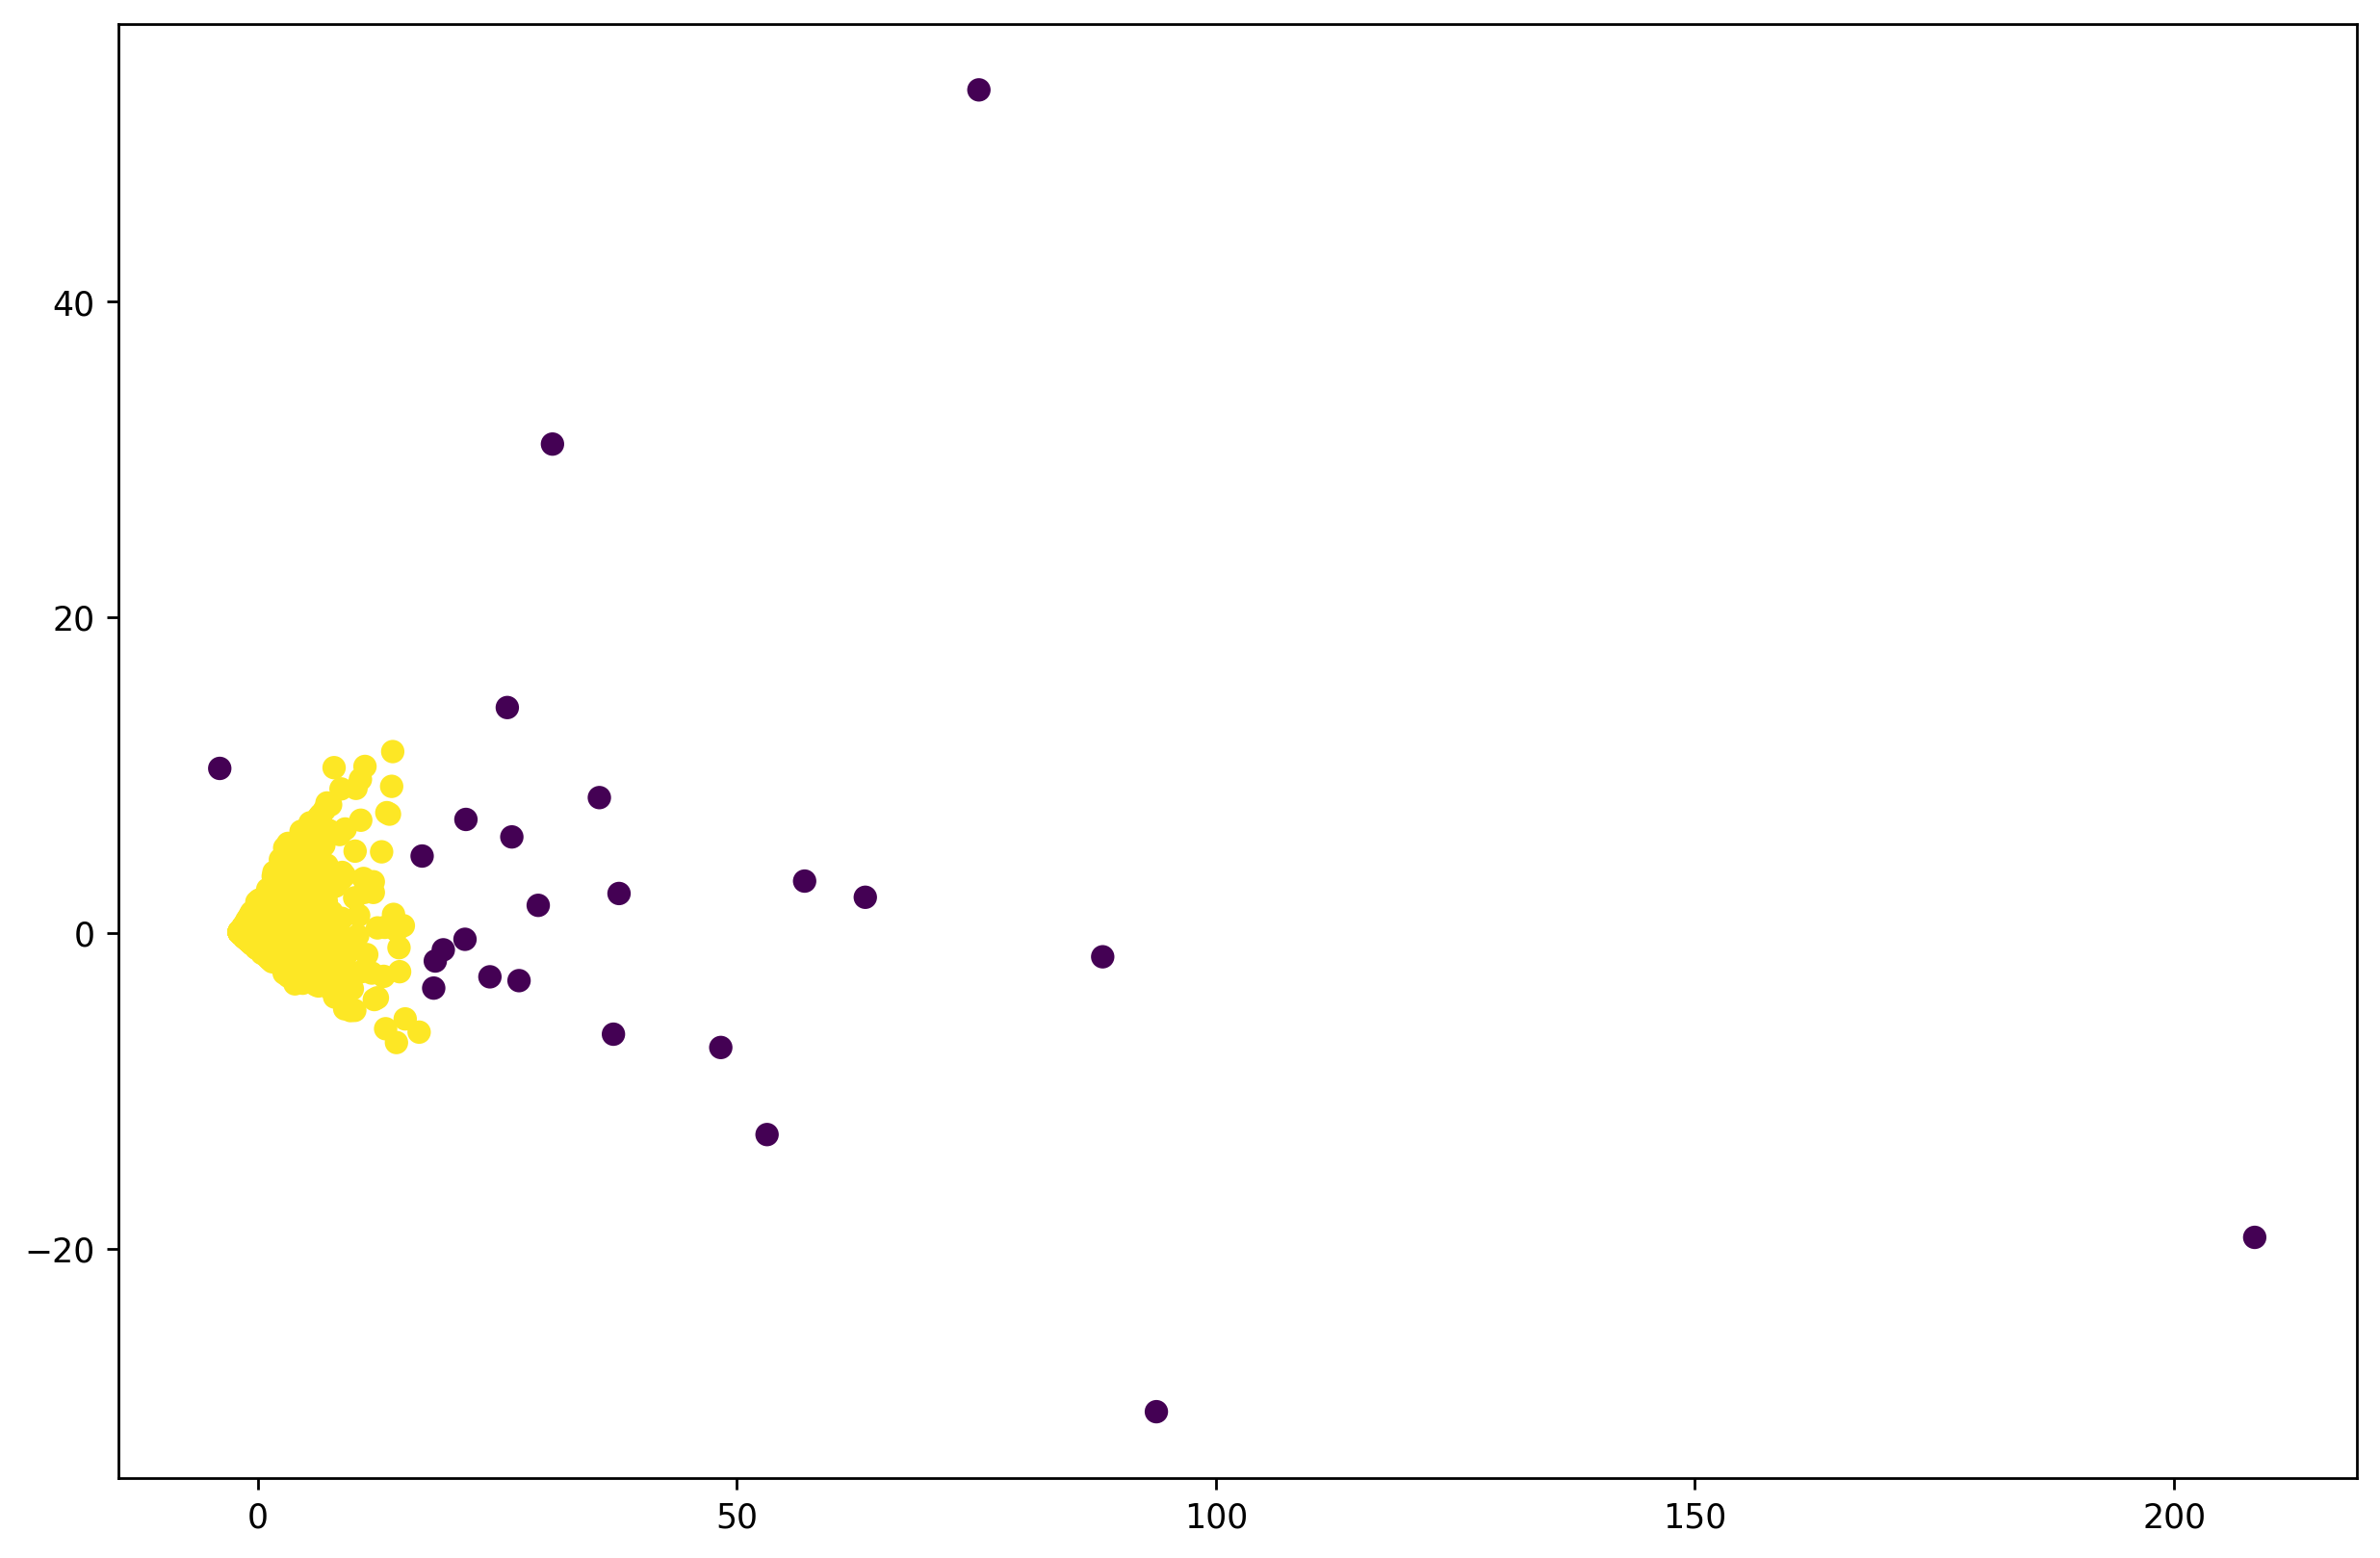

In [48]:
plt.figure(figsize=(12, 8), dpi=250)
#features = range(pcs.n_components_)
plt.scatter(pca_df[0], pca_df[1],c=db.labels_)
#plt.text(pca_df[0], pca_df[1], "xyz", fontsize=9)
plt.show()

In [49]:
cluster_features.iloc[outliers].shape

(24, 22)

In [49]:
outliers = np.where(db.labels_ == -1)

In [142]:
len(anomaly_clusters_db_scan)

24

In [51]:
anomaly_clusters_db_scan = set(cluster_features.iloc[outliers]['cluster_id'])

In [52]:
anomaly_clusters_lof = set(cluster_features.iloc[outliers_lof]['cluster_id'])

NameError: name 'outliers_lof' is not defined

In [137]:
len(anomaly_clusters_lof)

40

In [141]:
len(anomaly_clusters_lof.difference(anomaly_clusters_db_scan))

19

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [54]:
pca_eps_values = np.arange(3.5,7,0.1) 
pca_min_samples = np.arange(2,5)

In [55]:
import itertools
pca_dbscan_params = list(itertools.product(pca_eps_values, pca_min_samples))

In [56]:
new = []
for i,j in pca_dbscan_params:
    new.append((round(i,2),j))
pca_dbscan_params = new

In [57]:
len(pca_dbscan_params)

105

In [58]:
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
count = 1
for p in pca_dbscan_params:
    print(f"current param: {count}")
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(pca_df, pca_dbscan_cluster.labels_))
    count += 1
pca_eps_min = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df = pd.DataFrame(pca_eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])

current param: 1
current param: 2
current param: 3
current param: 4
current param: 5
current param: 6
current param: 7
current param: 8
current param: 9
current param: 10
current param: 11
current param: 12
current param: 13
current param: 14
current param: 15
current param: 16
current param: 17
current param: 18
current param: 19
current param: 20
current param: 21
current param: 22
current param: 23
current param: 24
current param: 25
current param: 26
current param: 27
current param: 28
current param: 29
current param: 30
current param: 31
current param: 32
current param: 33
current param: 34
current param: 35
current param: 36
current param: 37
current param: 38
current param: 39
current param: 40
current param: 41
current param: 42
current param: 43
current param: 44
current param: 45
current param: 46
current param: 47
current param: 48
current param: 49
current param: 50
current param: 51
current param: 52
current param: 53
current param: 54
current param: 55
current param: 56
c

Sorted the dataframe by the silhouette score

In [195]:
pca_eps_min_df.sort_values(['silhouette_score','no_of_clusters'],ascending=[False,False])

,no_of_clusters,silhouette_score,epsilon_values,minimum_points
51,2,0.967980,5.2,2
52,2,0.967980,5.2,3
54,2,0.967980,5.3,2
55,2,0.967980,5.3,3
57,2,0.967980,5.4,2
...,...,...,...,...
99,4,0.943295,6.8,2
102,4,0.943295,6.9,2
0,3,0.919190,3.5,2
45,3,0.915878,5.0,2


In [66]:
db3 = DBSCAN(eps=5.2,min_samples=2).fit(pca_df)

In [68]:
Counter(db3.labels_)

Counter({0: 6679, -1: 14})

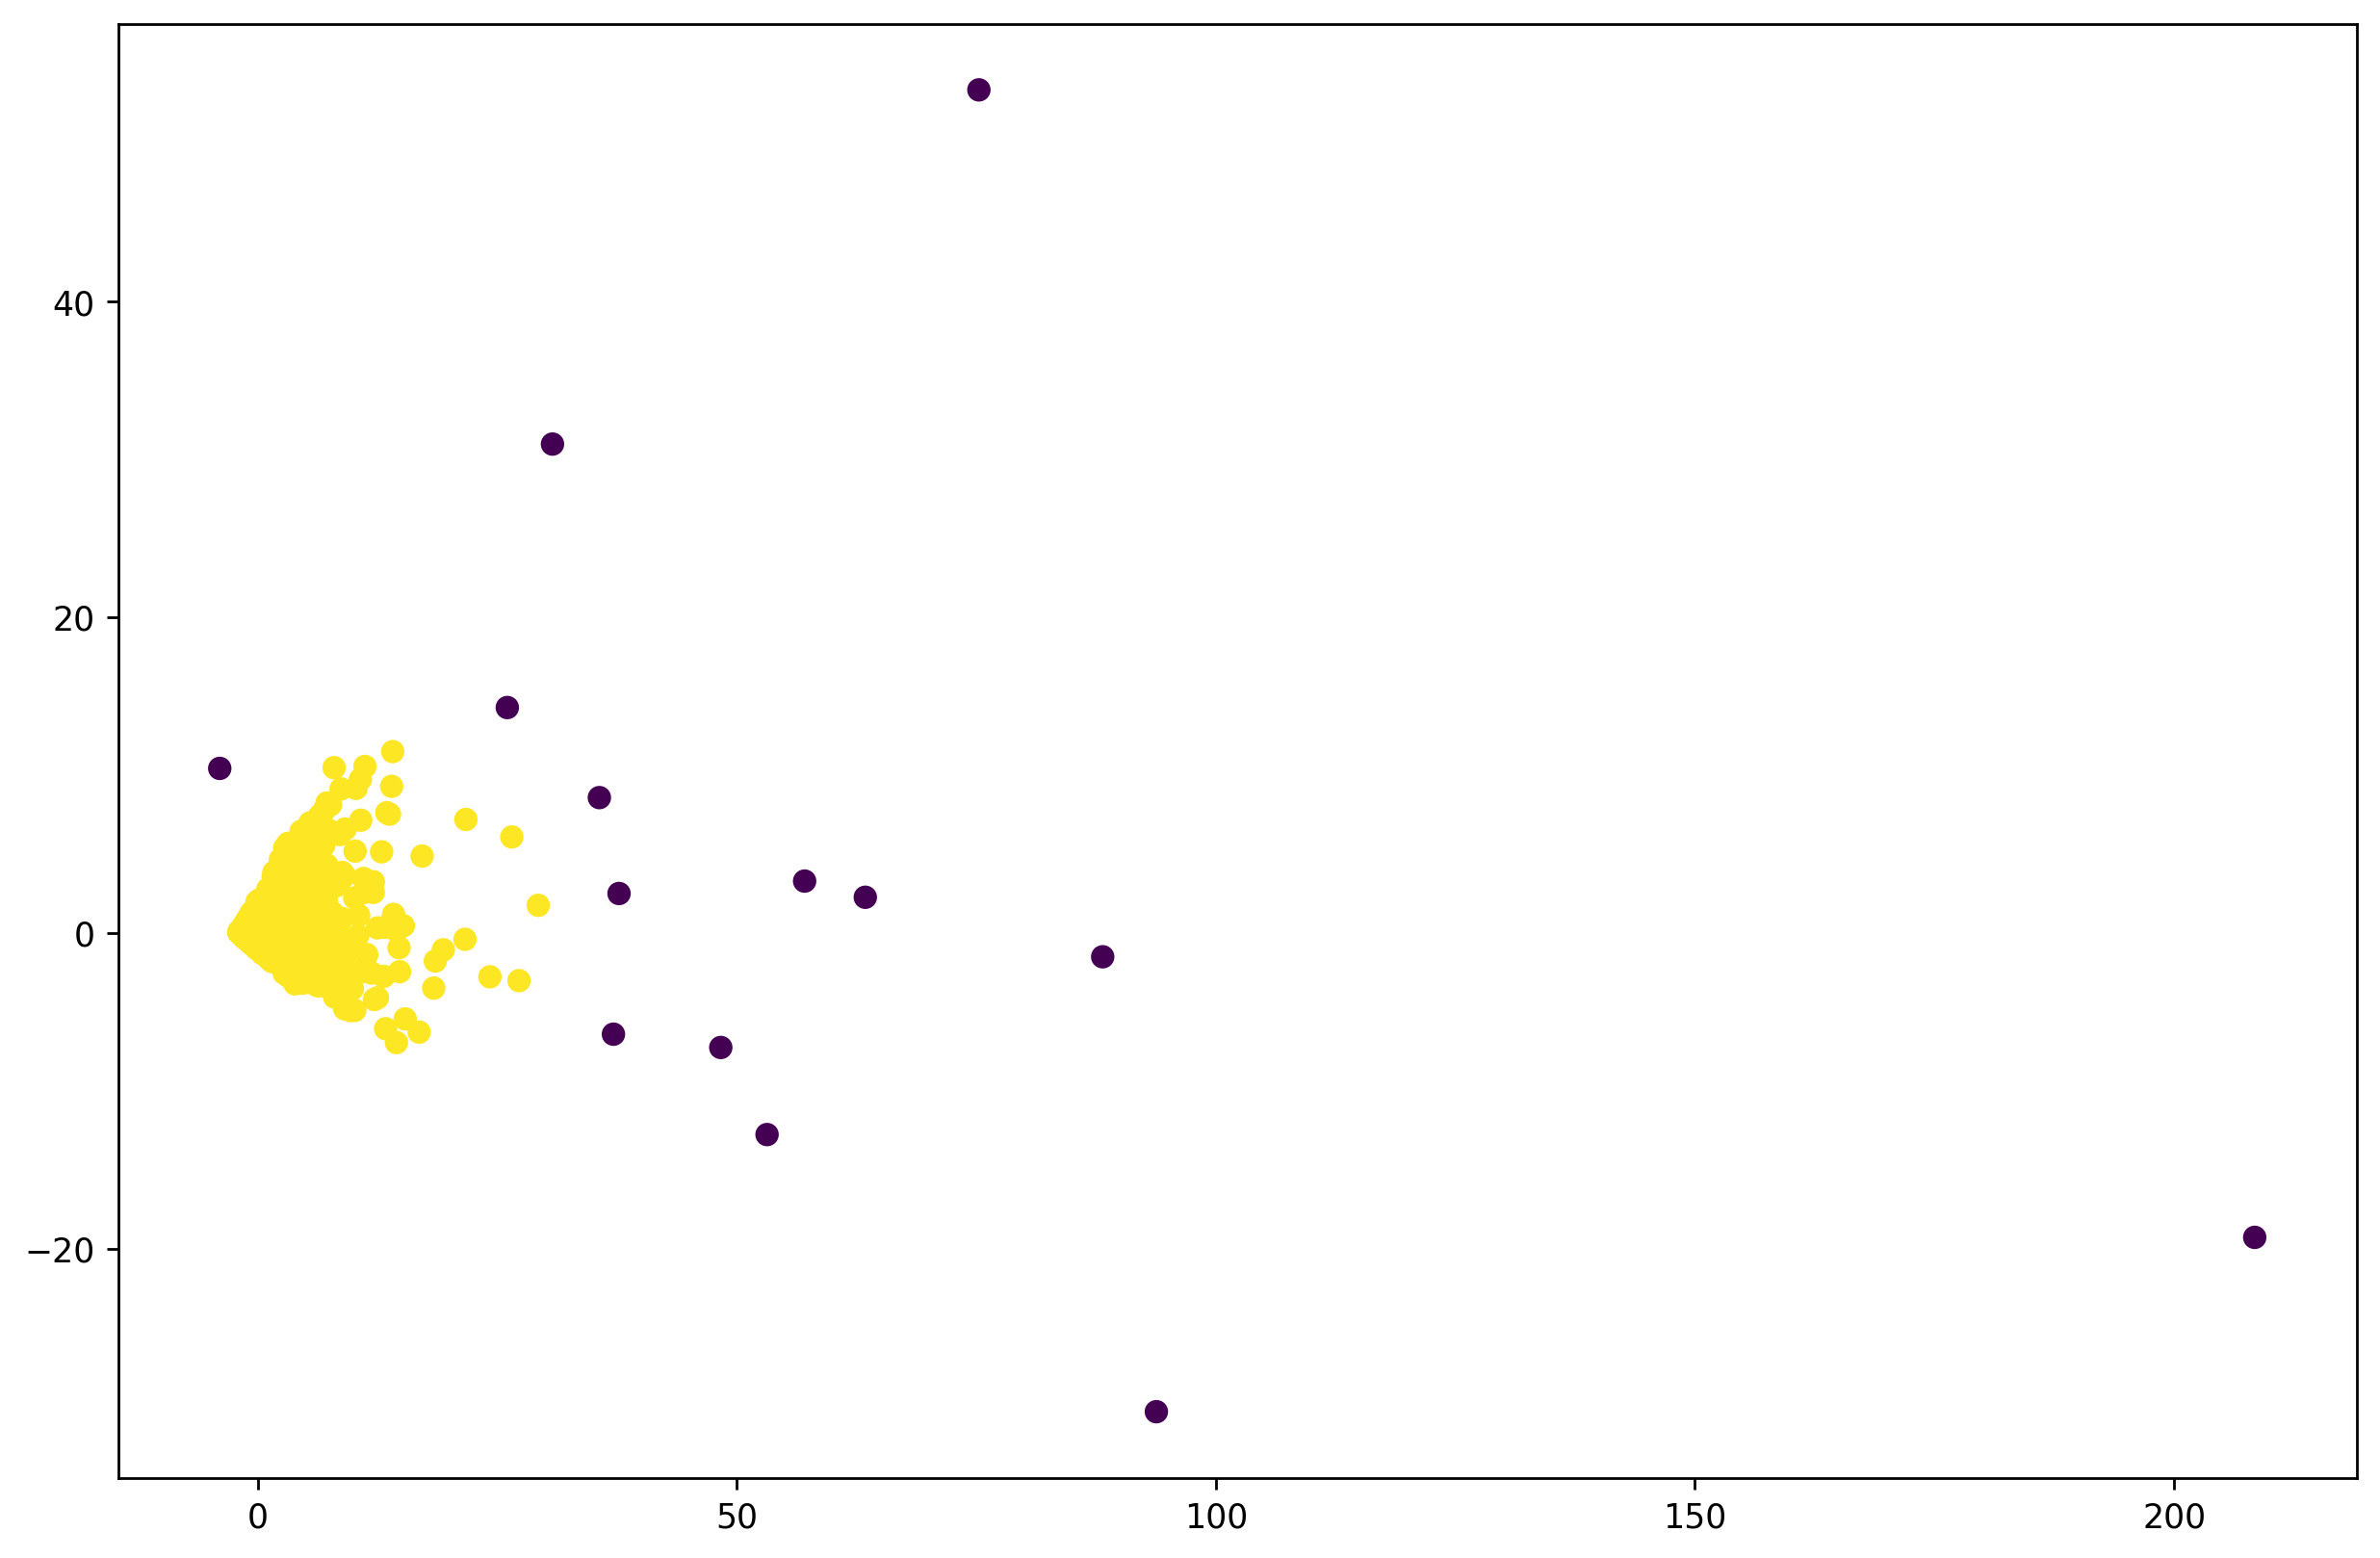

In [67]:
plt.figure(figsize=(12, 8), dpi=250)
#features = range(pcs.n_components_)
plt.scatter(pca_df[0], pca_df[1],c=db3.labels_)
#plt.text(pca_df[0], pca_df[1], fontsize=9)
plt.show()

In [59]:
all_cluster_ts = pd.read_csv("./datasets/all_clusters_full_data.csv")

/var/folders/bd/srftq4bj7r90mhbkt_4lfx880000gn/T/ipykernel_1222/983175905.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  all_cluster_ts = pd.read_csv("./datasets/all_clusters_full_data.csv")


In [60]:
all_cluster_ts['timestamp'] = pd.to_datetime(all_cluster_ts.timestamp, infer_datetime_format=True)

In [61]:
all_cluster_ts['label'] = 1

In [63]:
all_cluster_ts.loc[all_cluster_ts['cluster_id'].isin(anomaly_clusters_db_scan),'label'] = -1

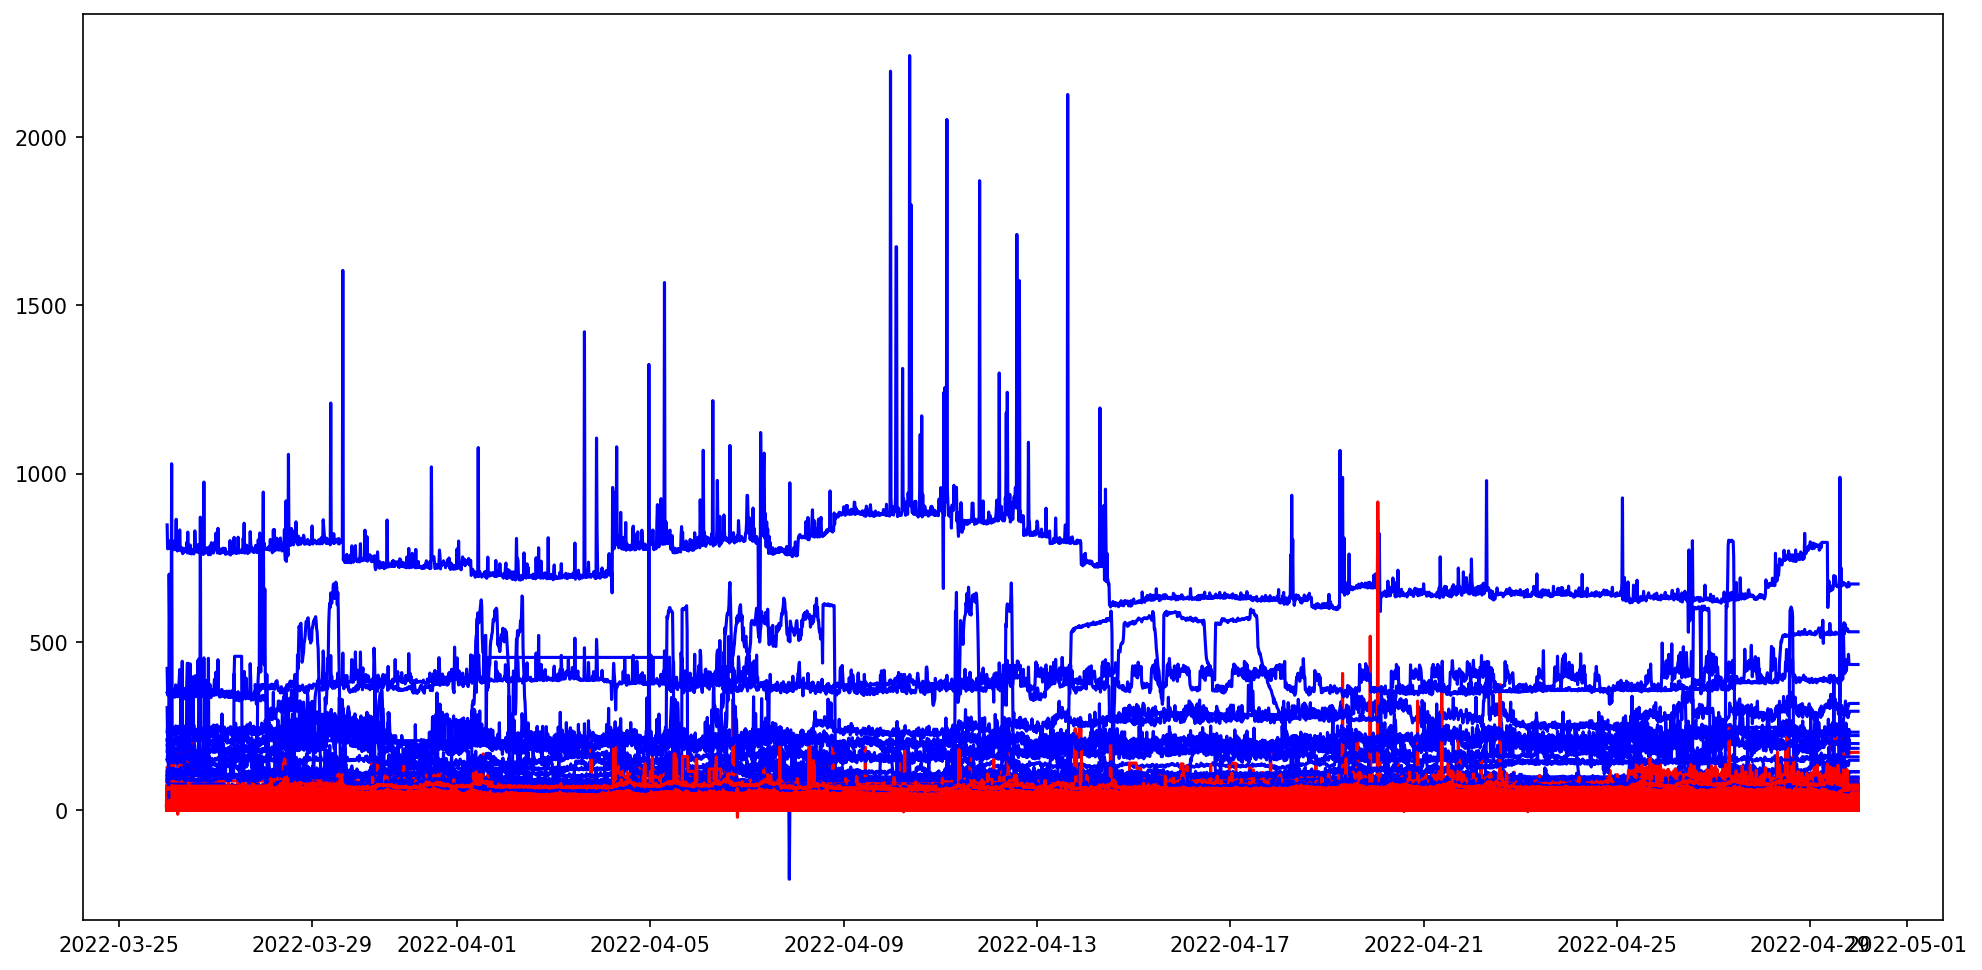

In [65]:
color = {1:'red',-1:'blue'}
plt.figure(figsize=(16, 8), dpi=150)
for cluster_id, df in all_cluster_ts.groupby('cluster_id'):
    label = (df['label'].unique()[-1])
    #print(label)
    plt.plot(df['timestamp'],df['cpu_usage'],color=color[label])
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(metric='manhattan')

In [ ]:
prediction = lof.fit_predict(pca_df)

In [ ]:
plt.figure(figsize=(12, 8), dpi=250)
#features = range(pcs.n_components_)
plt.scatter(pca_df[0], pca_df[1],c=prediction)
#plt.text(pca_df[0], pca_df[1], "xyz", fontsize=9)
plt.show()

In [ ]:
Counter(prediction)

In [ ]:
outliers_lof = np.where(prediction == -1)

In [288]:
from sklearn.ensemble import IsolationForest

In [356]:
iforest = IsolationForest(n_estimators=160,random_state=42)
iforest.fit(pca_df)

IsolationForest(n_estimators=160, random_state=42)

In [357]:
Counter(iforest.predict(pca_df))

Counter({1: 5953, -1: 740})

In [303]:
iforest.decision_function(pca_df)

array([ 0.05732075,  0.09462991, -0.00206962, ...,  0.09787341,
        0.12684306,  0.02772641])

In [353]:
pca_df[0].shape

(6693,)

Api_server_count

In [150]:
scalar_api = StandardScaler()

In [152]:
scalar_api.fit(cluster_features_api.drop(columns=['cluster_id']))

StandardScaler()

In [153]:
cluster_features_api_normalized = scalar_api.transform(cluster_features_api.drop(columns=['cluster_id']))

In [155]:
pca_api = PCA(n_components='mle')

In [156]:
pca_api.fit(cluster_features_api_normalized)
train_api = pca_api.transform(cluster_features_api_normalized)

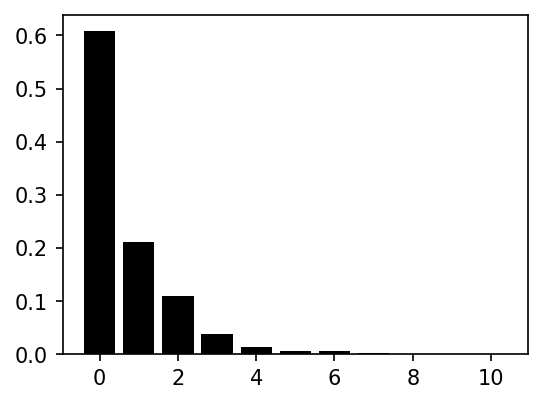

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3), dpi=150)
features = range(pca_api.n_components_)
plt.bar(features, pca_api.explained_variance_ratio_,color='black')
plt.show()

In [163]:
train_api = train_api[:,:3]

In [164]:
train_api.shape

(6521, 3)

In [177]:
pca_df_api = pd.DataFrame(train_api)

Top two PCA Feature of API Server

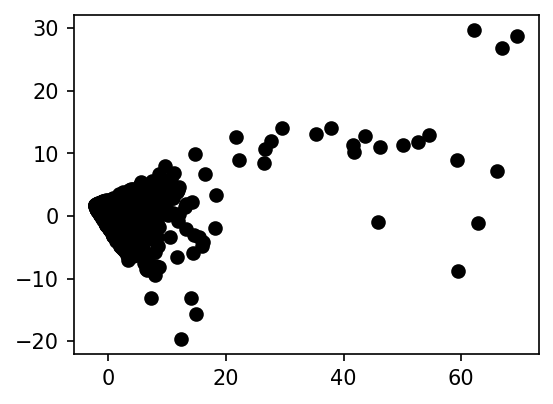

In [178]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(pca_df_api[0], pca_df_api[1],color='black')
plt.show()

In [175]:
train_api[:,0].shape

(6521,)

In [181]:
neigh2 = NearestNeighbors(n_neighbors=2)
nbrs = neigh2.fit(train_api)
distances_api, indices = nbrs.kneighbors(train_api)

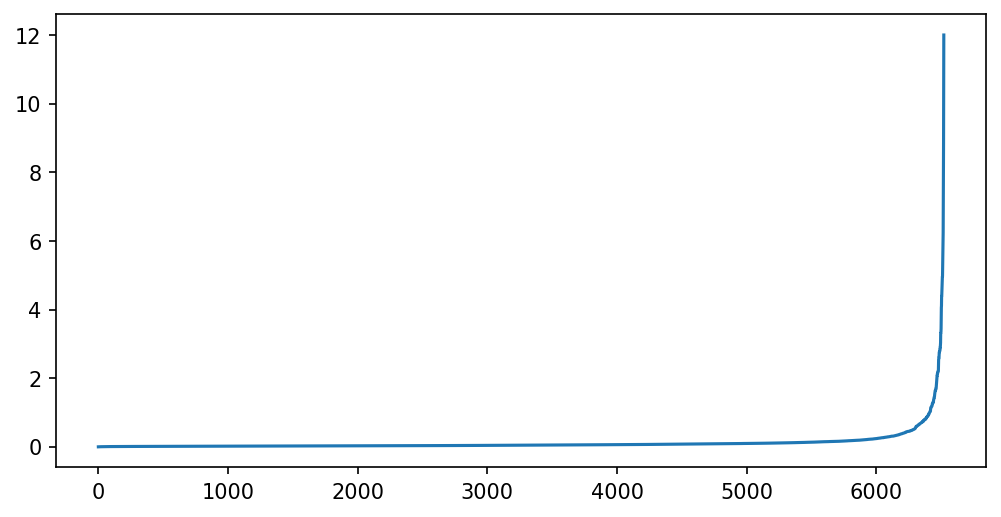

In [182]:
plt.figure(figsize=(8, 4), dpi=150)
distances_api = np.sort(distances_api[:,1])
#plt.yticks(range(1, 50,1))
plt.plot(distances_api)
#distances[distances > 1]

In [185]:
pca_eps_values = np.arange(1,2,0.1) 
pca_min_samples = np.arange(2,5)

In [190]:
pca_dbscan_params_api = list(itertools.product(pca_eps_values,pca_min_samples))

In [191]:
len(pca_dbscan_params_api)

30

In [196]:
pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
count = 1
for p in pca_dbscan_params_api:
    print(f"current param: {count}")
    pca_dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(pca_df_api)
    pca_epsvalues.append(p[0])
    pca_min_samp.append(p[1])
    pca_no_of_clusters.append(len(np.unique(pca_dbscan_cluster.labels_)))
    pca_sil_score.append(silhouette_score(pca_df_api, pca_dbscan_cluster.labels_))
    count += 1
pca_eps_min_api = list(zip(pca_no_of_clusters, pca_sil_score, pca_epsvalues, pca_min_samp))
pca_eps_min_df_api = pd.DataFrame(pca_eps_min_api, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values', 'minimum_points'])

current param: 1
current param: 2
current param: 3
current param: 4
current param: 5
current param: 6
current param: 7
current param: 8
current param: 9
current param: 10
current param: 11
current param: 12
current param: 13
current param: 14
current param: 15
current param: 16
current param: 17
current param: 18
current param: 19
current param: 20
current param: 21
current param: 22
current param: 23
current param: 24
current param: 25
current param: 26
current param: 27
current param: 28
current param: 29
current param: 30


In [197]:
pca_eps_min_df_api.sort_values(['silhouette_score','no_of_clusters'],ascending=[False,False])

,no_of_clusters,silhouette_score,epsilon_values,minimum_points
29,4,0.793156,1.9,4
28,3,0.756863,1.9,3
25,5,0.688163,1.8,3
26,6,0.681241,1.8,4
27,6,0.644926,1.9,2
16,11,0.644698,1.5,3
14,7,0.643644,1.4,4
17,8,0.643537,1.5,4
11,7,0.643252,1.3,4
10,9,0.642695,1.3,3


In [198]:
db_api = DBSCAN(eps=1.9,min_samples=4).fit(pca_df_api)

API Server Features Clustering to Understand Abnormality

In [69]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(pca_df_api[0], pca_df_api[1],c=db_api.labels_)
plt.show()

NameError: name 'pca_df_api' is not defined

<Figure size 600x450 with 0 Axes>